In [1]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [2]:
def lines_to_list(file_path):
    """
    Read a .txt file, convert each line into a separate list element, and return the list.

    Parameters:
    - file_path (str): Path to the input .txt file.

    Returns:
    - lines_list (list): List of lines as separate elements.
    """
    lines_list = []

    try:
        # Read the content of the .txt file
        with open(file_path, 'r') as file:
            lines_list = [line.strip() for line in file.readlines()]

    except FileNotFoundError:
        print(f"File not found: {file_path}")

    return lines_list

# Example usage:
train_val =  "C:/Users/HP/Desktop/My Papers/Conferences/FCN8/VOC2012/ImageSets/Segmentation/trainval.txt"
train_val_list = lines_to_list(train_val)
print(train_val_list)

train = "C:/Users/HP/Desktop/My Papers/Conferences/FCN8/VOC2012/ImageSets/Segmentation/train.txt"
train_list = lines_to_list(train)
print(train_list)

val = "C:/Users/HP/Desktop/My Papers/Conferences/FCN8/VOC2012/ImageSets/Segmentation/val.txt"
val_list = lines_to_list(val)
print(val_list)


['2007_000032', '2007_000033', '2007_000039', '2007_000042', '2007_000061', '2007_000063', '2007_000068', '2007_000121', '2007_000123', '2007_000129', '2007_000170', '2007_000175', '2007_000187', '2007_000241', '2007_000243', '2007_000250', '2007_000256', '2007_000323', '2007_000332', '2007_000333', '2007_000346', '2007_000363', '2007_000364', '2007_000392', '2007_000452', '2007_000464', '2007_000480', '2007_000491', '2007_000504', '2007_000515', '2007_000528', '2007_000529', '2007_000549', '2007_000559', '2007_000572', '2007_000584', '2007_000629', '2007_000636', '2007_000645', '2007_000648', '2007_000661', '2007_000663', '2007_000676', '2007_000713', '2007_000720', '2007_000727', '2007_000733', '2007_000738', '2007_000762', '2007_000768', '2007_000783', '2007_000793', '2007_000799', '2007_000804', '2007_000822', '2007_000830', '2007_000836', '2007_000837', '2007_000847', '2007_000862', '2007_000876', '2007_000904', '2007_000925', '2007_000999', '2007_001027', '2007_001073', '2007_001

In [3]:
import os
import shutil

def organize_images_and_masks(image_identifiers, image_directory, mask_directory, output_directory):
    """
    Organize images and masks based on identifiers into separate folders.

    Parameters:
    - image_identifiers (list): List of image identifiers.
    - image_directory (str): Directory path where images are stored.
    - mask_directory (str): Directory path where masks are stored.
    - output_directory (str): Directory path where "Images" and "Masks" folders will be created.

    Returns:
    None
    """
    # Create "Images" and "Masks" folders in the output directory
    images_folder = os.path.join(output_directory, 'Images')
    masks_folder = os.path.join(output_directory, 'Masks')

    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(masks_folder, exist_ok=True)

    # Copy images and masks to the corresponding folders based on identifiers
    for identifier in image_identifiers:
        image_src_path = os.path.join(image_directory, f'{identifier}.jpg')
        mask_src_path = os.path.join(mask_directory, f'{identifier}.png')

        image_dest_path = os.path.join(images_folder, f'{identifier}.jpg')
        mask_dest_path = os.path.join(masks_folder, f'{identifier}.png')

        # Copy images
        shutil.copy(image_src_path, image_dest_path)

        # Copy masks
        shutil.copy(mask_src_path, mask_dest_path)

In [4]:
# Specify the directory paths
image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/VOC2012/JPEGImages'
mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/VOC2012/SegmentationClass'

# Example usage:
train_val_image_identifiers = lines_to_list(train_val)  # Load identifiers from your text file
train_image_identifiers = lines_to_list(train)
val_image_identifiers = lines_to_list(val)

train_val_output_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train_Val'
train_output_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train'
val_output_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val'

## Organize images and masks into separate folders: Do not repeat these lines once the directories have been created!
# organize_images_and_masks(train_val_image_identifiers, image_directory, mask_directory, train_val_output_directory)
# organize_images_and_masks(train_image_identifiers, image_directory, mask_directory, train_output_directory)
# organize_images_and_masks(val_image_identifiers, image_directory, mask_directory, val_output_directory)

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_and_annotate_data(image_directory, annotation_directory, batch_size, target_size):
    """
    Load and annotate training or validation data for semantic segmentation.

    Parameters:
    - image_directory (str): Directory path where images are stored.
    - annotation_directory (str): Directory path where segmentation masks are stored.
    - batch_size (int): Batch size for the data generator.
    - target_size (tuple): Target size for resizing images and masks.

    Returns:
    - data_generator (tf.keras.preprocessing.image.DirectoryIterator): Data generator for training or validation.
    """
    # Image data generator with augmentation (you can customize this based on your needs)
    data_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Flow from directory with the specified batch size and target size
    train_data_generator = data_generator.flow_from_directory(
        image_directory,
        class_mode=None,
        color_mode='rgb',
        batch_size=batch_size,
        target_size=target_size,
        seed=42
    )

    # Flow from directory with the specified batch size and target size
    mask_generator = data_generator.flow_from_directory(
        annotation_directory,
        class_mode=None,
        color_mode='grayscale',  # Assuming masks are grayscale
        batch_size=batch_size,
        target_size=target_size,
        seed=42
    )

    # Combine the image and mask generators into one
    data_generator = zip(train_data_generator, mask_generator)

    return data_generator

# Example usage:
train_image_directory = "C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images"
train_annotation_directory = "C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks"
val_image_directory = "C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images"
val_annotation_directory = "C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks"

batch_size = 32
target_size = (256, 256)  # Adjust based on your model input size

# Load and annotate training data
train_data_generator = load_and_annotate_data(train_image_directory, train_annotation_directory, batch_size, target_size)

# Load and annotate validation data
val_data_generator = load_and_annotate_data(val_image_directory, val_annotation_directory, batch_size, target_size)


Found 1477 images belonging to 21 classes.
Found 1477 images belonging to 21 classes.
Found 1449 images belonging to 21 classes.
Found 501 images belonging to 21 classes.


The message "Found 0 images belonging to 0 classes" typically indicates that the flow_from_directory method couldn't find any images in the specified directories or there might be an issue with the directory structure.

Here are some things to check:

Directory Structure:

Ensure that your directory structure is correct. The images and masks should be organized in subdirectories under the image_directory and annotation_directory respectively. The subdirectories should be named after the class or category of the images.
Example:

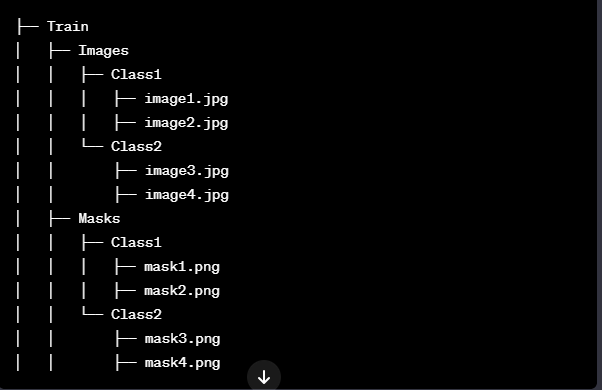

In [6]:
def read_class_txt_file(file_path):
    """
    Read a class text file and convert each line into a list.

    Parameters:
    - file_path (str): Path to the class text file.

    Returns:
    - data_list (list): List of lists, where each sublist contains the image identifier.
    """
    data_list = []

    with open(file_path, 'r') as file:
        for line in file:
            # Remove trailing numbers and split by space
            image_identifier = line.strip().split()[0]
            data_list.append(image_identifier)

    return data_list


In [3]:
import os
import shutil

def read_image_names(directory_path):
    """
    Read image names from a single directory.

    Parameters:
    - directory_path (str): Path to the directory containing images.

    Returns:
    - list of str: List of image names.
    """
    image_names = [file for file in os.listdir(directory_path) if file.lower().endswith('.jpg')]
    return image_names

def copy_masks(image_names, source_mask_directory, target_directory):
    """
    Copy masks to a target directory based on a list of image names.

    Parameters:
    - image_names (list of str): List of image names.
    - source_mask_directory (str): Path to the directory containing masks.
    - target_directory (str): Path to the target directory where masks will be copied.
    """
    for image_name in image_names:
        # Construct the full file paths
        image_base_name = os.path.splitext(image_name)[0]  # Remove the '.jpg' extension
        mask_name = f'{image_base_name}.png'
        source_mask_path = os.path.join(source_mask_directory, mask_name)
        target_mask_path = os.path.join(target_directory, mask_name)
        # Copy the mask file to the target directory
        shutil.copy(source_mask_path, target_directory)


In [34]:
image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/motorbike'
image_names = read_image_names(image_directory)
print(image_names)
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/motorbike'
copy_masks(image_names, source_mask_directory, target_directory)

## Train_Image_Mask_Map: Do not repeat these lines once the directories have been created!

# Step 1: Read image names from a single directory
aeroplane_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/aeroplane'
aeroplane_image_names = read_image_names(aeroplane_image_directory)

bicycle_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/bicycle'
bicycle_image_names = read_image_names(bicycle_image_directory)

bird_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/bird'
bird_image_names = read_image_names(bird_image_directory)

boat_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/boat'
boat_image_names = read_image_names(boat_image_directory)

bottle_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/bottle'
bottle_image_names = read_image_names(bottle_image_directory)

bus_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/bus'
bus_image_names = read_image_names(bus_image_directory)

car_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/car'
car_image_names = read_image_names(car_image_directory)

cat_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/cat'
cat_image_names = read_image_names(cat_image_directory)

chair_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/chair'
chair_image_names = read_image_names(chair_image_directory)

cow_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/cow'
cow_image_names = read_image_names(cow_image_directory)

diningtable_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/diningtable'
diningtable_image_names = read_image_names(diningtable_image_directory)

dog_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/dog'
dog_image_names = read_image_names(dog_image_directory)

horse_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/horse'
horse_image_names = read_image_names(horse_image_directory)

motorbike_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/motorbike'
motorbike_image_names = read_image_names(motorbike_image_directory)

person_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/person'
person_image_names = read_image_names(person_image_directory)

pottedplant_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/pottedplant'
pottedplant_image_names = read_image_names(pottedplant_image_directory)

sheep_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/sheep'
sheep_image_names = read_image_names(sheep_image_directory)

sofa_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/sofa'
sofa_image_names = read_image_names(sofa_image_directory)

train_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/train'
train_image_names = read_image_names(train_image_directory)

truck_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/truck'
truck_image_names = read_image_names(truck_image_directory)

tvmonitor_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Images/tvmonitor'
tvmonitor_image_names = read_image_names(tvmonitor_image_directory)


# Step 2: Copy masks to a target directory based on the list of image names
#aeroplane
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/aeroplane'
copy_masks(aeroplane_image_names, source_mask_directory, target_directory)
#bicycle
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/bicycle'
copy_masks(bicycle_image_names, source_mask_directory, target_directory)
#bird
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/bird'
copy_masks(bird_image_names, source_mask_directory, target_directory)
#boat
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/boat'
copy_masks(boat_image_names, source_mask_directory, target_directory)
#bottle
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/bottle'
copy_masks(bottle_image_names, source_mask_directory, target_directory)
#bus
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/bus'
copy_masks(bus_image_names, source_mask_directory, target_directory)
#car
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/car'
copy_masks(car_image_names, source_mask_directory, target_directory)
#cat
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/cat'
copy_masks(cat_image_names, source_mask_directory, target_directory)
#chain
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/chair'
copy_masks(chair_image_names, source_mask_directory, target_directory)
#cow
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/cow'
copy_masks(cow_image_names, source_mask_directory, target_directory)
#diningtable
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/diningtable'
copy_masks(diningtable_image_names, source_mask_directory, target_directory)
#dog
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/dog'
copy_masks(dog_image_names, source_mask_directory, target_directory)
#horse
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/horse'
copy_masks(horse_image_names, source_mask_directory, target_directory)
#motorbike
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/motorbike'
copy_masks(motorbike_image_names, source_mask_directory, target_directory)
#person
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/person'
copy_masks(person_image_names, source_mask_directory, target_directory)
#pottedplant
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/pottedplant'
copy_masks(pottedplant_image_names, source_mask_directory, target_directory)
#sheep
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/sheep'
copy_masks(sheep_image_names, source_mask_directory, target_directory)
#sofa
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/sofa'
copy_masks(sofa_image_names, source_mask_directory, target_directory)
#train
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/train'
copy_masks(train_image_names, source_mask_directory, target_directory)
#truck
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/truck'
copy_masks(truck_image_names, source_mask_directory, target_directory)
#tvmonitor
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Train/Masks/tvmonitor'
copy_masks(tvmonitor_image_names, source_mask_directory, target_directory)


['2007_000364.jpg', '2007_000733.jpg', '2007_000822.jpg', '2007_001709.jpg', '2007_002105.jpg', '2007_002488.jpg', '2007_004003.jpg', '2007_005212.jpg', '2007_005314.jpg', '2007_005878.jpg', '2007_005951.jpg', '2007_005989.jpg', '2007_006585.jpg', '2007_007355.jpg', '2007_007783.jpg', '2007_007902.jpg', '2007_008994.jpg', '2007_009139.jpg', '2007_009209.jpg', '2007_009322.jpg', '2008_000144.jpg', '2008_001119.jpg', '2008_001203.jpg', '2008_001375.jpg', '2008_001643.jpg', '2008_001691.jpg', '2008_002123.jpg', '2008_002772.jpg', '2008_002972.jpg', '2008_003429.jpg', '2008_003769.jpg', '2008_004365.jpg', '2008_004822.jpg', '2008_004838.jpg', '2008_006345.jpg', '2008_007313.jpg', '2008_007428.jpg', '2008_008324.jpg', '2008_008462.jpg', '2008_008525.jpg', '2009_000161.jpg', '2009_000894.jpg', '2009_001140.jpg', '2009_001253.jpg', '2009_001443.jpg', '2009_001755.jpg', '2009_002216.jpg', '2009_002763.jpg', '2009_003012.jpg', '2009_003090.jpg', '2009_003522.jpg', '2009_003539.jpg', '2009_00382

In [2]:
# Val_Image_Mask_Map: Do not repeat these lines once the directories have been created!

# Step 1: Read image names from a single directory
aeroplane_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/aeroplane'
aeroplane_val_image_names = read_image_names(aeroplane_val_image_directory)

bicycle_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/bicycle'
bicycle_val_image_names = read_image_names(bicycle_val_image_directory)

bird_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/bird'
bird_val_image_names = read_image_names(bird_val_image_directory)

boat_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/boat'
boat_val_image_names = read_image_names(boat_val_image_directory)

bottle_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/bottle'
bottle_val_image_names = read_image_names(bottle_val_image_directory)

bus_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/bus'
bus_val_image_names = read_image_names(bus_val_image_directory)

car_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/car'
car_val_image_names = read_image_names(car_val_image_directory)

cat_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/cat'
cat_val_image_names = read_image_names(cat_val_image_directory)

chair_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/chair'
chair_val_image_names = read_image_names(chair_val_image_directory)

cow_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/cow'
cow_val_image_names = read_image_names(cow_val_image_directory)

diningtable_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/diningtable'
diningtable_val_image_names = read_image_names(diningtable_val_image_directory)

dog_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/dog'
dog_val_image_names = read_image_names(dog_val_image_directory)

horse_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/horse'
horse_val_image_names = read_image_names(horse_val_image_directory)

motorbike_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/motorbike'
motorbike_val_image_names = read_image_names(motorbike_val_image_directory)

person_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/person'
person_val_image_names = read_image_names(person_val_image_directory)

pottedplant_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/pottedplant'
pottedplant_val_image_names = read_image_names(pottedplant_val_image_directory)

sheep_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/sheep'
sheep_val_image_names = read_image_names(sheep_val_image_directory)

sofa_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/sofa'
sofa_val_image_names = read_image_names(sofa_val_image_directory)

train_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/train'
train_val_image_names = read_image_names(train_val_image_directory)

truck_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/truck'
truck_val_image_names = read_image_names(truck_val_image_directory)

tvmonitor_val_image_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Images/tvmonitor'
tvmonitor_val_image_names = read_image_names(tvmonitor_image_directory)


# Step 2: Copy masks to a target directory based on the list of image names
#aeroplane
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/aeroplane'
copy_masks(aeroplane_val_image_names, source_mask_directory, target_directory)
#bicycle
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/bicycle'
copy_masks(bicycle_val_image_names, source_mask_directory, target_directory)
#bird
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/bird'
copy_masks(bird_val_image_names, source_mask_directory, target_directory)
#boat
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/boat'
copy_masks(boat_val_image_names, source_mask_directory, target_directory)
#bottle
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/bottle'
copy_masks(bottle_val_image_names, source_mask_directory, target_directory)
#bus
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/bus'
copy_masks(bus_val_image_names, source_mask_directory, target_directory)
#car
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/car'
copy_masks(car_val_image_names, source_mask_directory, target_directory)
#cat
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/cat'
copy_masks(cat_val_image_names, source_mask_directory, target_directory)
#chain
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/chair'
copy_masks(chair_val_image_names, source_mask_directory, target_directory)
#cow
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/cow'
copy_masks(cow_val_image_names, source_mask_directory, target_directory)
#diningtable
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/diningtable'
copy_masks(diningtable_val_image_names, source_mask_directory, target_directory)
#dog
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/dog'
copy_masks(dog_val_image_names, source_mask_directory, target_directory)
#horse
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/horse'
copy_masks(horse_val_image_names, source_mask_directory, target_directory)
#motorbike
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/motorbike'
copy_masks(motorbike_val_image_names, source_mask_directory, target_directory)
#person
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/person'
copy_masks(person_val_image_names, source_mask_directory, target_directory)
#pottedplant
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/pottedplant'
copy_masks(pottedplant_val_image_names, source_mask_directory, target_directory)
#sheep
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/sheep'
copy_masks(sheep_val_image_names, source_mask_directory, target_directory)
#sofa
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/sofa'
copy_masks(sofa_val_image_names, source_mask_directory, target_directory)
#train
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/train'
copy_masks(train_val_image_names, source_mask_directory, target_directory)
#truck
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/truck'
copy_masks(truck_val_image_names, source_mask_directory, target_directory)
#tvmonitor
source_mask_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks'
target_directory = 'C:/Users/HP/Desktop/My Papers/Conferences/FCN8/Data/Val/Masks/tvmonitor'
copy_masks(tvmonitor_val_image_names, source_mask_directory, target_directory)


NameError: name 'read_image_names' is not defined